# UN Millennium Goals- Pipeline
## Next steps
Create algorithm to perform analysis on all prediction variables to forecast 2008 and 2012.

In [1]:
#trim this list!
import numpy as np
import pandas as pd
#from sklearn import cross_validation
#from sklearn import neighbors
#from sklearn import grid_search
#from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
%matplotlib inline

import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots

#from pandas.tools.plotting import autocorrelation_plot

In [2]:
# Load data
trainingdf = pd.read_csv("TrainingSet.csv", index_col=0) 

# Check head
trainingdf.head()

,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],...,2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],Country Name,Series Code,Series Name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.769214,Afghanistan,allsi.bi_q1,(%) Benefits held by 1st 20% population - All ...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.027746,Afghanistan,allsp.bi_q1,(%) Benefits held by 1st 20% population - All ...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.244887,Afghanistan,allsa.bi_q1,(%) Benefits held by 1st 20% population - All ...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.933105,Afghanistan,allsi.gen_pop,(%) Generosity of All Social Insurance
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.996814,Afghanistan,allsp.gen_pop,(%) Generosity of All Social Protection


In [3]:
submission_labels = pd.read_csv("SubmissionRows.csv", index_col=0)
submission_labels.head()

,2008 [YR2008],2012 [YR2012]
559,NaN,NaN
618,NaN,NaN
753,NaN,NaN
1030,NaN,NaN
1896,NaN,NaN


In [4]:
#to more easily reference year (from DataDriven)

def generate_year_list(start, stop=None):
    """ 
    make a list of column names for specific years
    in the format they appear in the data frame start/stop inclusive
    """
    
    if isinstance(start, list):
        data_range = start
    elif stop:
        data_range = range(start, stop+1)
    else:
        data_range = [start]
    
    yrs = []
    
    for yr in data_range:
        yrs.append("{0} [YR{0}]".format(yr))
        
    return yrs

In [7]:
prediction_rows = trainingdf.loc[submission_labels.index]
prediction_rows_yearsonly = prediction_rows[generate_year_list(1972, 2007)]
transposed = prediction_rows_yearsonly.transpose()
transposed.tail()

,559,618,753,1030,1896,1955,2090,2690,3233,3292,...,283137,283460,284003,284062,284197,284474,285340,285399,285534,285811
2003 [YR2003],0.325,0.000879,0.1244,0.001,0.963,0.009719,0.0245,0.939567,0.874,0.021954,...,0.001,NaN,0.557,0.009805,0.1433,0.144,0.796,0.063948,0.0985,0.213
2004 [YR2004],0.360,0.001058,0.1210,0.001,0.963,0.024204,0.0233,0.946588,0.866,0.046345,...,0.001,0.869995,0.566,0.020135,0.1349,0.141,0.796,0.065640,0.0973,0.198
2005 [YR2005],0.395,0.012241,0.1177,0.001,0.962,0.060439,0.0222,0.946235,0.859,0.058439,...,0.001,0.952192,0.575,0.028518,0.1270,0.138,0.797,0.080160,0.0966,0.184
2006 [YR2006],0.430,0.021071,0.1145,0.001,0.962,0.096100,0.0212,0.942501,0.852,0.073760,...,0.001,0.943943,0.583,0.041599,0.1204,0.136,0.797,0.097918,0.0958,0.173
2007 [YR2007],0.465,0.019000,0.1115,0.001,0.961,0.150361,0.0203,0.939003,0.844,0.094512,...,0.001,0.950790,0.592,0.048700,0.1146,0.134,0.797,0.108500,0.0960,0.164


In [199]:
prediction_rows_yearsonly.isnull().sum()

1972 [YR1972]    565
1973 [YR1973]    567
1974 [YR1974]    567
1975 [YR1975]    558
1976 [YR1976]    551
1977 [YR1977]    545
1978 [YR1978]    542
1979 [YR1979]    537
1980 [YR1980]    536
1981 [YR1981]    524
1982 [YR1982]    518
1983 [YR1983]    518
1984 [YR1984]    511
1985 [YR1985]    508
1986 [YR1986]    502
1987 [YR1987]    510
1988 [YR1988]    507
1989 [YR1989]    506
1990 [YR1990]     77
1991 [YR1991]    233
1992 [YR1992]    218
1993 [YR1993]    204
1994 [YR1994]    159
1995 [YR1995]    111
1996 [YR1996]     80
1997 [YR1997]     77
1998 [YR1998]     62
1999 [YR1999]     36
2000 [YR2000]     23
2001 [YR2001]     24
2002 [YR2002]     22
2003 [YR2003]     24
2004 [YR2004]     24
2005 [YR2005]     11
2006 [YR2006]     12
2007 [YR2007]      0
dtype: int64

In [176]:
prediction_rows_post90 = prediction_rows[generate_year_list(1990, 2007)]
transposed_90 = prediction_rows_post90.transpose()
transposed_90.tail()

,559,618,753,1030,1896,1955,2090,2690,3233,3292,...,283137,283460,284003,284062,284197,284474,285340,285399,285534,285811
2003 [YR2003],0.325,0.000879,0.1244,0.001,0.963,0.009719,0.0245,0.939567,0.874,0.021954,...,0.001,NaN,0.557,0.009805,0.1433,0.144,0.796,0.063948,0.0985,0.213
2004 [YR2004],0.360,0.001058,0.1210,0.001,0.963,0.024204,0.0233,0.946588,0.866,0.046345,...,0.001,0.869995,0.566,0.020135,0.1349,0.141,0.796,0.065640,0.0973,0.198
2005 [YR2005],0.395,0.012241,0.1177,0.001,0.962,0.060439,0.0222,0.946235,0.859,0.058439,...,0.001,0.952192,0.575,0.028518,0.1270,0.138,0.797,0.080160,0.0966,0.184
2006 [YR2006],0.430,0.021071,0.1145,0.001,0.962,0.096100,0.0212,0.942501,0.852,0.073760,...,0.001,0.943943,0.583,0.041599,0.1204,0.136,0.797,0.097918,0.0958,0.173
2007 [YR2007],0.465,0.019000,0.1115,0.001,0.961,0.150361,0.0203,0.939003,0.844,0.094512,...,0.001,0.950790,0.592,0.048700,0.1146,0.134,0.797,0.108500,0.0960,0.164


In [187]:
prediction_rows_post96 = prediction_rows[generate_year_list(1996, 2007)]
transposed_96 = prediction_rows_post96.transpose()
transposed_96.tail()

,559,618,753,1030,1896,1955,2090,2690,3233,3292,...,283137,283460,284003,284062,284197,284474,285340,285399,285534,285811
2003 [YR2003],0.325,0.000879,0.1244,0.001,0.963,0.009719,0.0245,0.939567,0.874,0.021954,...,0.001,NaN,0.557,0.009805,0.1433,0.144,0.796,0.063948,0.0985,0.213
2004 [YR2004],0.360,0.001058,0.1210,0.001,0.963,0.024204,0.0233,0.946588,0.866,0.046345,...,0.001,0.869995,0.566,0.020135,0.1349,0.141,0.796,0.065640,0.0973,0.198
2005 [YR2005],0.395,0.012241,0.1177,0.001,0.962,0.060439,0.0222,0.946235,0.859,0.058439,...,0.001,0.952192,0.575,0.028518,0.1270,0.138,0.797,0.080160,0.0966,0.184
2006 [YR2006],0.430,0.021071,0.1145,0.001,0.962,0.096100,0.0212,0.942501,0.852,0.073760,...,0.001,0.943943,0.583,0.041599,0.1204,0.136,0.797,0.097918,0.0958,0.173
2007 [YR2007],0.465,0.019000,0.1115,0.001,0.961,0.150361,0.0203,0.939003,0.844,0.094512,...,0.001,0.950790,0.592,0.048700,0.1146,0.134,0.797,0.108500,0.0960,0.164


In [193]:
prediction_rows_all = prediction_rows[generate_year_list(1972, 2007)]
transposed_all = prediction_rows_all.transpose()
transposed_all.tail()

,559,618,753,1030,1896,1955,2090,2690,3233,3292,...,283137,283460,284003,284062,284197,284474,285340,285399,285534,285811
2003 [YR2003],0.325,0.000879,0.1244,0.001,0.963,0.009719,0.0245,0.939567,0.874,0.021954,...,0.001,NaN,0.557,0.009805,0.1433,0.144,0.796,0.063948,0.0985,0.213
2004 [YR2004],0.360,0.001058,0.1210,0.001,0.963,0.024204,0.0233,0.946588,0.866,0.046345,...,0.001,0.869995,0.566,0.020135,0.1349,0.141,0.796,0.065640,0.0973,0.198
2005 [YR2005],0.395,0.012241,0.1177,0.001,0.962,0.060439,0.0222,0.946235,0.859,0.058439,...,0.001,0.952192,0.575,0.028518,0.1270,0.138,0.797,0.080160,0.0966,0.184
2006 [YR2006],0.430,0.021071,0.1145,0.001,0.962,0.096100,0.0212,0.942501,0.852,0.073760,...,0.001,0.943943,0.583,0.041599,0.1204,0.136,0.797,0.097918,0.0958,0.173
2007 [YR2007],0.465,0.019000,0.1115,0.001,0.961,0.150361,0.0203,0.939003,0.844,0.094512,...,0.001,0.950790,0.592,0.048700,0.1146,0.134,0.797,0.108500,0.0960,0.164


In [194]:
#replace na with mean
post90nona= transposed_90.fillna(transposed_90.mean(), inplace=True)
post96nona= transposed_96.fillna(transposed_96.mean(), inplace=True)
allnona= transposed_all.fillna(transposed_all.mean(), inplace=True)

In [178]:
post90nona

,559,618,753,1030,1896,1955,2090,2690,3233,3292,...,283137,283460,284003,284062,284197,284474,285340,285399,285534,285811
1990 [YR1990],0.207529,0.000000,0.1762,0.001,0.963714,0.000000,0.0425,0.833833,0.939,0.000000,...,0.001,0.805459,0.491,0.000000,0.1919,0.104,0.792,0.000000,0.0740,0.107
1991 [YR1991],0.048000,0.006793,0.1693,0.001,0.963714,0.025108,0.0412,0.844134,0.940,0.021643,...,0.001,0.805459,0.494,0.010659,0.1930,0.117,0.793,0.031410,0.0771,0.142
1992 [YR1992],0.049000,0.006793,0.1627,0.001,0.963714,0.025108,0.0398,0.849658,0.941,0.021643,...,0.001,0.805459,0.498,0.010659,0.1932,0.129,0.794,0.031410,0.0811,0.177
1993 [YR1993],0.049000,0.006793,0.1571,0.001,0.963714,0.025108,0.0384,0.842352,0.942,0.021643,...,0.001,0.805459,0.502,0.010659,0.1924,0.138,0.794,0.031410,0.0857,0.210
1994 [YR1994],0.049000,0.006793,0.1521,0.001,0.964000,0.025108,0.0371,0.841658,0.935,0.000004,...,0.001,0.774600,0.505,0.000068,0.1905,0.146,0.794,0.000017,0.0901,0.237
1995 [YR1995],0.049000,0.006793,0.1479,0.001,0.964000,0.000112,0.0358,0.846157,0.928,0.000018,...,0.001,0.757281,0.509,0.000088,0.1878,0.151,0.795,0.000077,0.0944,0.258
1996 [YR1996],0.084000,0.006793,0.1446,0.001,0.965000,0.000322,0.0344,0.845856,0.921,0.000017,...,0.001,0.805459,0.513,0.000091,0.1849,0.155,0.795,0.000168,0.0980,0.271
1997 [YR1997],0.118000,0.006793,0.1417,0.001,0.965000,0.000486,0.0329,0.844342,0.914,0.000103,...,0.001,0.805459,0.518,0.000093,0.1822,0.156,0.795,0.000331,0.1006,0.276
1998 [YR1998],0.152000,0.006793,0.1391,0.001,0.965000,0.000650,0.0315,0.887010,0.908,0.000202,...,0.001,0.729307,0.522,0.000302,0.1791,0.156,0.795,0.000816,0.1020,0.275
1999 [YR1999],0.187000,0.006793,0.1366,0.001,0.965000,0.000814,0.0300,0.878822,0.901,0.001995,...,0.001,0.714921,0.527,0.001471,0.1747,0.155,0.795,0.001617,0.1025,0.268


In [189]:
post96nona

,559,618,753,1030,1896,1955,2090,2690,3233,3292,...,283137,283460,284003,284062,284197,284474,285340,285399,285534,285811
1996 [YR1996],0.084,0.007763,0.1446,0.001,0.965,0.000322,0.0344,0.845856,0.921,0.000017,...,0.001,0.814241,0.513,0.000091,0.1849,0.155,0.795,0.000168,0.0980,0.271
1997 [YR1997],0.118,0.007763,0.1417,0.001,0.965,0.000486,0.0329,0.844342,0.914,0.000103,...,0.001,0.814241,0.518,0.000093,0.1822,0.156,0.795,0.000331,0.1006,0.276
1998 [YR1998],0.152,0.007763,0.1391,0.001,0.965,0.000650,0.0315,0.911035,0.908,0.000202,...,0.001,0.729307,0.522,0.000302,0.1791,0.156,0.795,0.000816,0.1020,0.275
1999 [YR1999],0.187,0.007763,0.1366,0.001,0.965,0.000814,0.0300,0.878822,0.901,0.001995,...,0.001,0.714921,0.527,0.001471,0.1747,0.155,0.795,0.001617,0.1025,0.268
2000 [YR2000],0.221,0.007763,0.1339,0.001,0.965,0.001141,0.0286,0.890507,0.894,0.004917,...,0.001,0.713893,0.531,0.001911,0.1687,0.153,0.795,0.004014,0.1023,0.257
2001 [YR2001],0.256,0.000047,0.1310,0.001,0.964,0.003258,0.0271,0.915648,0.887,0.006461,...,0.001,0.711314,0.539,0.002331,0.1610,0.151,0.796,0.007998,0.1014,0.243
2002 [YR2002],0.291,0.000046,0.1277,0.001,0.964,0.003901,0.0257,0.932315,0.881,0.015916,...,0.001,0.741813,0.548,0.004778,0.1521,0.147,0.796,0.039944,0.1001,0.228
2003 [YR2003],0.325,0.000879,0.1244,0.001,0.963,0.009719,0.0245,0.939567,0.874,0.021954,...,0.001,0.814241,0.557,0.009805,0.1433,0.144,0.796,0.063948,0.0985,0.213
2004 [YR2004],0.360,0.001058,0.1210,0.001,0.963,0.024204,0.0233,0.946588,0.866,0.046345,...,0.001,0.869995,0.566,0.020135,0.1349,0.141,0.796,0.065640,0.0973,0.198
2005 [YR2005],0.395,0.012241,0.1177,0.001,0.962,0.060439,0.0222,0.946235,0.859,0.058439,...,0.001,0.952192,0.575,0.028518,0.1270,0.138,0.797,0.080160,0.0966,0.184


In [179]:
#trim years to year only
post90nona.index = post90nona.index.str. replace(r'\s+(\S+)','')
#(regex=True, inplace=True, to_replace='\D', value='')
#need to create a date index 
post90nona.index = pd.to_datetime(post90nona.index)
#data.set_index('Date', inplace=True)
post90nona.index

DatetimeIndex(['1990-01-01', '1991-01-01', '1992-01-01', '1993-01-01',
               '1994-01-01', '1995-01-01', '1996-01-01', '1997-01-01',
               '1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
               '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
               '2006-01-01', '2007-01-01'],
              dtype='datetime64[ns]', freq=None)

In [190]:
#trim years to year only
post96nona.index = post96nona.index.str. replace(r'\s+(\S+)','')
#(regex=True, inplace=True, to_replace='\D', value='')
#need to create a date index 
post96nona.index = pd.to_datetime(post96nona.index)
#data.set_index('Date', inplace=True)
post96nona.index

DatetimeIndex(['1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01',
               '2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01'],
              dtype='datetime64[ns]', freq=None)

In [195]:
#trim years to year only
allnona.index = allnona.index.str. replace(r'\s+(\S+)','')
#(regex=True, inplace=True, to_replace='\D', value='')
#need to create a date index 
allnona.index = pd.to_datetime(allnona.index)
#data.set_index('Date', inplace=True)
allnona.index

DatetimeIndex(['1972-01-01', '1973-01-01', '1974-01-01', '1975-01-01',
               '1976-01-01', '1977-01-01', '1978-01-01', '1979-01-01',
               '1980-01-01', '1981-01-01', '1982-01-01', '1983-01-01',
               '1984-01-01', '1985-01-01', '1986-01-01', '1987-01-01',
               '1988-01-01', '1989-01-01', '1990-01-01', '1991-01-01',
               '1992-01-01', '1993-01-01', '1994-01-01', '1995-01-01',
               '1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01',
               '2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01'],
              dtype='datetime64[ns]', freq=None)

In [10]:
import statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA

                              ARMA Model Results                              
Dep. Variable:                    753   No. Observations:                   18
Model:                     ARMA(1, 0)   Log Likelihood                  71.670
Method:                       css-mle   S.D. of innovations              0.004
Date:                Mon, 03 Oct 2016   AIC                           -137.339
Time:                        10:52:11   BIC                           -134.668
Sample:                    01-01-1990   HQIC                          -136.971
                         - 01-01-2007                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.1435      0.030      4.816      0.000         0.085     0.202
ar.L1.753      0.9914      0.012     81.179      0.000         0.967     1.015
                                    Roots           

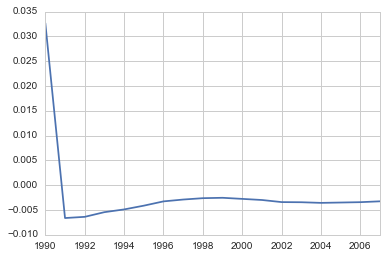

In [180]:
#test single series
data=post90nona.iloc[:, 2:3]
#compare AR, MA, ARMA, and ARIMA
model = sm.tsa.ARIMA(data, (1, 0, 0)).fit()
#unable to get MA, ARMA, or ARIMA to work- problem with dtype?
print model.summary()
print model.resid.plot()


Axes(0.125,0.125;0.775x0.775)


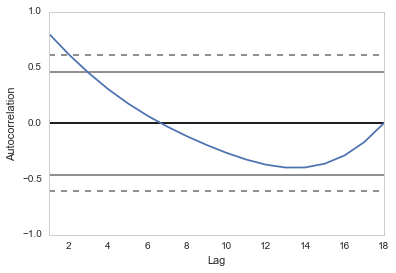

In [181]:
print autocorrelation_plot(data)

In [39]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

In [41]:
n = len(data)
train = data[:int(.80*n)]
test = data[int(.80*n):]
train

,753
1990-01-01,0.1762
1991-01-01,0.1693
1992-01-01,0.1627
1993-01-01,0.1571
1994-01-01,0.1521
1995-01-01,0.1479
1996-01-01,0.1446
1997-01-01,0.1417
1998-01-01,0.1391
1999-01-01,0.1366


In [42]:
predmodel = sm.tsa.ARIMA(train, (1, 0, 0)).fit()

predictions = predmodel.predict(
    '2004-01-01',
    '2007-01-01',
    dynamic=True, 
)

print("Mean absolute error: ", mean_absolute_error(test, predictions))
predmodel.summary()


('Mean absolute error: ', 0.0091833136149207621)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    753   No. Observations:                   14
Model:                     ARMA(1, 0)   Log Likelihood                  54.853
Method:                       css-mle   S.D. of innovations              0.004
Date:                Sun, 02 Oct 2016   AIC                           -103.706
Time:                        15:01:42   BIC                           -101.789
Sample:                    01-01-1990   HQIC                          -103.883
                         - 01-01-2003                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.1499      0.023      6.445      0.000         0.104     0.195
ar.L1.753      0.9847      0.022     45.204      0.000         0.942     1.027
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0155           +0.0000j            1.0155            0.0000
-----------------------------------------------------------------------------
"""

In [82]:
#forecast 2008 and 2012 (out of sample forecast)
predictions812 = predmodel.forecast(
    steps=5, exog=None, alpha=0.05
)
#check above parameters
print predictions812[0]
#export to submission file

[ 0.12478923  0.12517251  0.12554993  0.12592159  0.12628757]


In [85]:
pred_2008 = predictions812[0][0]
       
pred_2012 = predictions812[0][4]
        
submissions = np.array([pred_2008, pred_2012])
print submissions 

[ 0.12478923  0.12628757]


In [46]:
post90nona.iloc[:, 0:1]

,559
1990-01-01,0.207529
1991-01-01,0.048000
1992-01-01,0.049000
1993-01-01,0.049000
1994-01-01,0.049000
1995-01-01,0.049000
1996-01-01,0.084000
1997-01-01,0.118000
1998-01-01,0.152000
1999-01-01,0.187000


In [138]:
len(post90nona.columns)

737

In [166]:
def simple_model(column):
    
    try:
        model = sm.tsa.ARIMA(column, (1, 0, 0)).fit()
    #return  
        predictions = model.forecast(
        steps=5, exog=None, alpha=0.05
        )
    #forecasts = predictions[0]
    #one year
        pred_2008 = predictions[0][0]
    # five years
        pred_2012 = predictions[0][4]
    except np.linalg.LinAlgError:
    #return
        mean_predictions= column.mean()
        pred_2008 = mean_predictions
        pred_2012 = mean_predictions
        
    submissions = np.array([pred_2008, pred_2012])
    ix = pd.Index(generate_year_list([2008, 2012]))
    return pd.Series(data=submissions, index=ix)

In [167]:
test_predictions = post90nona.apply(simple_model)

test_predictions

C:\Users\Heather\Anaconda\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Heather\Anaconda\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Heather\Anaconda\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Heather\Anaconda\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


,559,618,753,1030,1896,1955,2090,2690,3233,3292,...,283137,283460,284003,284062,284197,284474,285340,285399,285534,285811
2008 [YR2008],0.456199,0.016520,0.111774,0.001,0.961145,0.150361,0.020384,0.936868,0.844,0.094512,...,0.001,0.938763,0.592,0.0487,0.1146,0.133625,0.796925,0.104956,0.095753,0.163928
2012 [YR2012],0.425299,0.010935,0.112848,0.001,0.961623,0.150361,0.020715,0.929165,0.844,0.094512,...,0.001,0.902380,0.592,0.0487,0.1146,0.132291,0.796647,0.092685,0.094831,0.163677


In [196]:
test_predictions_96 = post96nona.apply(simple_model)

test_predictions_96

C:\Users\Heather\Anaconda\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Heather\Anaconda\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Heather\Anaconda\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Heather\Anaconda\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Heather\Anaconda\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "

,559,618,753,1030,1896,1955,2090,2690,3233,3292,...,283137,283460,284003,284062,284197,284474,285340,285399,285534,285811
2008 [YR2008],0.465,0.016603,0.111814,0.001,0.961125,0.150361,0.020434,0.932050,0.844731,0.094512,...,0.001,0.938066,0.591186,0.0487,0.115334,0.134305,0.796873,0.1085,0.096278,0.164
2012 [YR2012],0.465,0.011758,0.113014,0.001,0.961556,0.150361,0.020946,0.915432,0.847520,0.094512,...,0.001,0.901415,0.588091,0.0487,0.118119,0.135443,0.796498,0.1085,0.097064,0.164


In [197]:
test_predictions_all = allnona.apply(simple_model)

test_predictions_all

C:\Users\Heather\Anaconda\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Heather\Anaconda\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Heather\Anaconda\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Heather\Anaconda\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Heather\Anaconda\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "

,559,618,753,1030,1896,1955,2090,2690,3233,3292,...,283137,283460,284003,284062,284197,284474,285340,285399,285534,285811
2008 [YR2008],0.459174,0.016113,0.111675,0.001,0.961095,0.150361,0.021020,0.930169,0.845361,0.092590,...,0.001,0.938501,0.590421,0.047763,0.115009,0.136217,0.796615,0.104909,0.096107,0.174289
2012 [YR2012],0.437721,0.010266,0.112370,0.001,0.961433,0.150361,0.023474,0.902888,0.850355,0.085593,...,0.001,0.900657,0.584670,0.044336,0.116595,0.140099,0.795760,0.092592,0.096500,0.197430


In [139]:
submission_labels.head()

,2008 [YR2008],2012 [YR2012]
559,NaN,NaN
618,NaN,NaN
753,NaN,NaN
1030,NaN,NaN
1896,NaN,NaN


In [168]:
submission_values = test_predictions.transpose()
submission_values.head()

,2008 [YR2008],2012 [YR2012]
559,0.456199,0.425299
618,0.016520,0.010935
753,0.111774,0.112848
1030,0.001000,0.001000
1896,0.961145,0.961623


In [198]:
submission_values_96 = test_predictions_96.transpose()
submission_values_96.to_csv("HEAdams2.csv")
submission_values_all = test_predictions_all.transpose()
submission_values_all.to_csv("HEAdams3.csv")

In [169]:
submission_values.to_csv("HEAdams1.csv")